<a href="https://colab.research.google.com/github/lirui720/Google-E-Commerce-RFM-model/blob/main/RFM_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [280]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
plt.rcParams["figure.figsize"] = (20, 10)

random.seed(42)

In [281]:
df = pd.read_csv('/content/drive/MyDrive/rfmdata.csv')
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df.head()

,fullVisitorId,date,revenue
0,4474128110841843619,2017-06-12,122.96
1,7731550683138800842,2016-10-07,47.18
2,9549186864389701668,2017-06-21,16.99
3,8986872282597680783,2017-05-21,34.19
4,9804405852019862459,2017-06-12,13.98


In [282]:
df_recency = df.groupby(by='fullVisitorId',
                        as_index=False)['date'].max()
df_recency.columns = ['fullVisitorId', 'date']
recent_date = df_recency['date'].max()
df_recency['Recency'] = df_recency['date'].apply(
    lambda x: (recent_date - x).days)
df_recency.head()


,fullVisitorId,date,Recency
0,213131142648941,2017-04-28,95
1,435324061339869,2016-10-20,285
2,562678147042735,2017-04-24,99
3,585708896049892,2016-12-21,223
4,670722016498267,2017-07-10,22


In [283]:
frequency_df = df.drop_duplicates().groupby(
    by=['fullVisitorId'], as_index=False)['date'].count()
frequency_df.columns = ['fullVisitorId', 'Frequency']
frequency_df.head()

,fullVisitorId,Frequency
0,213131142648941,1
1,435324061339869,1
2,562678147042735,1
3,585708896049892,1
4,670722016498267,1


In [284]:

monetary_df = df.groupby(by='fullVisitorId', as_index=False)['revenue'].sum()
monetary_df.columns = ['fullVisitorId', 'Monetary']
monetary_df.head()

,fullVisitorId,Monetary
0,213131142648941,39.59
1,435324061339869,46.79
2,562678147042735,158.31
3,585708896049892,45.97
4,670722016498267,43.98


In [285]:
rf_df = df_recency.merge(frequency_df, on='fullVisitorId')
rfm_df = rf_df.merge(monetary_df, on='fullVisitorId').drop(
    columns='date')
rfm_df.head()

,fullVisitorId,Recency,Frequency,Monetary
0,213131142648941,95,1,39.59
1,435324061339869,285,1,46.79
2,562678147042735,99,1,158.31
3,585708896049892,223,1,45.97
4,670722016498267,22,1,43.98


### **1. Achieve Customer segragation by implementing statistical rules to group customer.**

In [286]:
rfm_df['R_rank'] = rfm_df['Recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True)
 
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['F_rank']/rfm_df['M_rank'].max())*100
 
rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
 
rfm_df.head()

,fullVisitorId,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,213131142648941,95,1,39.59,71.204451,45.173069,45.173069
1,435324061339869,285,1,46.79,21.668087,45.173069,45.173069
2,562678147042735,99,1,158.31,69.765927,45.173069,45.173069
3,585708896049892,223,1,45.97,42.584332,45.173069,45.173069
4,670722016498267,22,1,43.98,91.940254,45.173069,45.173069


In [287]:
rfm_df['RFM_Score'] = 0.15*rfm_df['R_rank_norm']+0.28 * \
    rfm_df['F_rank_norm']+0.57*rfm_df['M_rank_norm']
rfm_df['RFM_Score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['fullVisitorId', 'RFM_Score']].head(7)

,fullVisitorId,RFM_Score
0,213131142648941,2.45
1,435324061339869,2.08
2,562678147042735,2.44
3,585708896049892,2.24
4,670722016498267,2.61
5,852801263780322,2.59
6,1123528056036404,2.20


In [288]:
rfm_df["Customer_segment"] = np.where(rfm_df['RFM_Score'] >
                                      4.5, "Top Customers",
                                      (np.where(
                                        rfm_df['RFM_Score'] > 4,
                                        "High value Customer",
                                        (np.where(
    rfm_df['RFM_Score'] > 3,
                             "Medium Value Customer",
                             np.where(rfm_df['RFM_Score'] > 1.6,
                            'Low Value Customers', 'Lost Customers'))))))
rfm_df[['fullVisitorId', 'RFM_Score', 'Customer_segment']].head(20)

,fullVisitorId,RFM_Score,Customer_segment
0,213131142648941,2.45,Low Value Customers
1,435324061339869,2.08,Low Value Customers
2,562678147042735,2.44,Low Value Customers
3,585708896049892,2.24,Low Value Customers
4,670722016498267,2.61,Low Value Customers
5,852801263780322,2.59,Low Value Customers
6,1123528056036404,2.20,Low Value Customers
7,1905118576359487,2.08,Low Value Customers
8,2527528149176601,2.16,Low Value Customers
9,2709834583138581,2.22,Low Value Customers


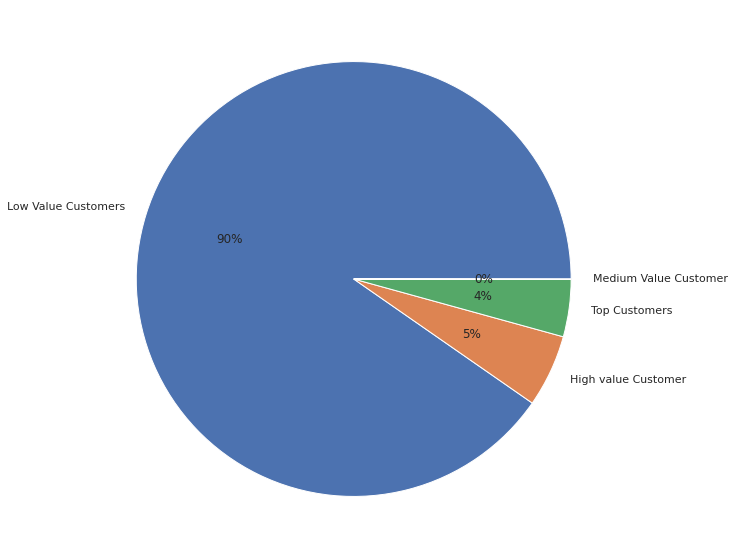

In [289]:
plt.pie(rfm_df.Customer_segment.value_counts(),
        labels=rfm_df.Customer_segment.value_counts().index,
        autopct='%.0f%%')
plt.show()

In [290]:
rrfm=rfm_df.groupby(["Customer_segment"])["Recency","Frequency","Monetary"].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


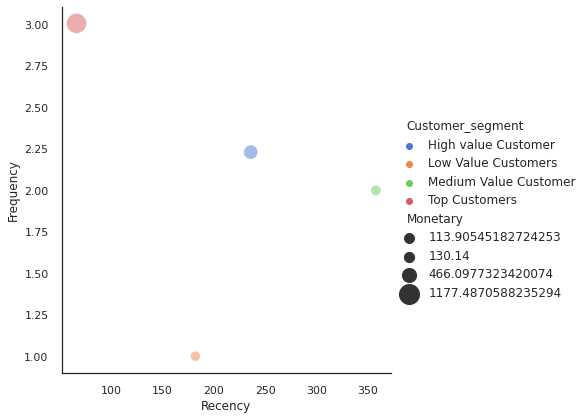

In [291]:
sns.set_theme(style="white")

sns.relplot(x="Recency", y="Frequency",hue="Customer_segment", size="Monetary",
            sizes=(100, 400), alpha=.5, palette="muted",
            height=6, data=rrfm)

Grouped customer based on a self-defined score which is calculated by Recency, Frequency and Monetary Value.


### **2. Achieve Customer segragation by using  k means clustering algorithm**


In [292]:
rfm_df.head()

,fullVisitorId,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,Customer_segment
0,213131142648941,95,1,39.59,71.20,45.17,45.17,2.45,Low Value Customers
1,435324061339869,285,1,46.79,21.67,45.17,45.17,2.08,Low Value Customers
2,562678147042735,99,1,158.31,69.77,45.17,45.17,2.44,Low Value Customers
3,585708896049892,223,1,45.97,42.58,45.17,45.17,2.24,Low Value Customers
4,670722016498267,22,1,43.98,91.94,45.17,45.17,2.61,Low Value Customers


In [293]:
rfm_df.describe()

,fullVisitorId,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score
count,9.996000e+03,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000
mean,4.478856e+18,179.993197,1.151861,178.086157,50.107559,50.002310,50.002310,2.500920
std,3.066153e+18,108.295980,0.710352,1437.161083,28.928202,14.790216,14.790216,0.676665
min,2.131311e+14,0.000000,1.000000,1.200000,0.140000,45.170000,45.170000,1.920000
25%,1.577139e+18,84.000000,1.000000,29.887500,25.090000,45.170000,45.170000,2.120000
50%,4.346933e+18,183.000000,1.000000,55.205000,50.010000,45.170000,45.170000,2.330000
75%,7.132082e+18,270.000000,1.000000,117.065000,75.350000,45.170000,45.170000,2.540000
max,9.998996e+18,365.000000,33.000000,128412.520000,100.000000,100.000000,100.000000,5.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


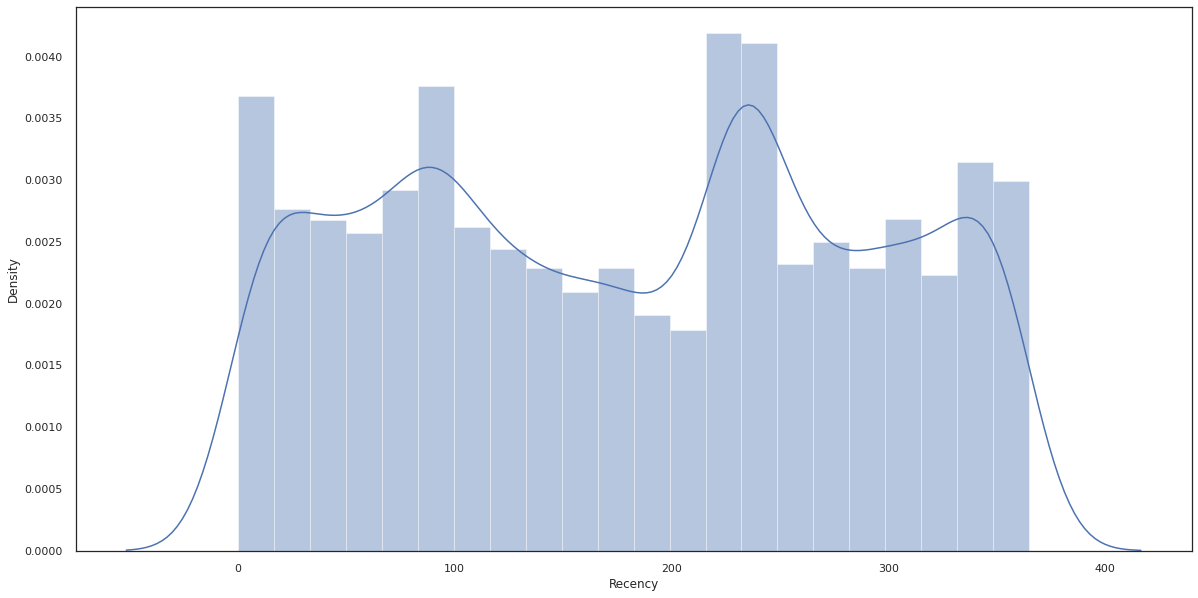

In [294]:
x = rfm_df['Recency']

ax = sns.distplot(x)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


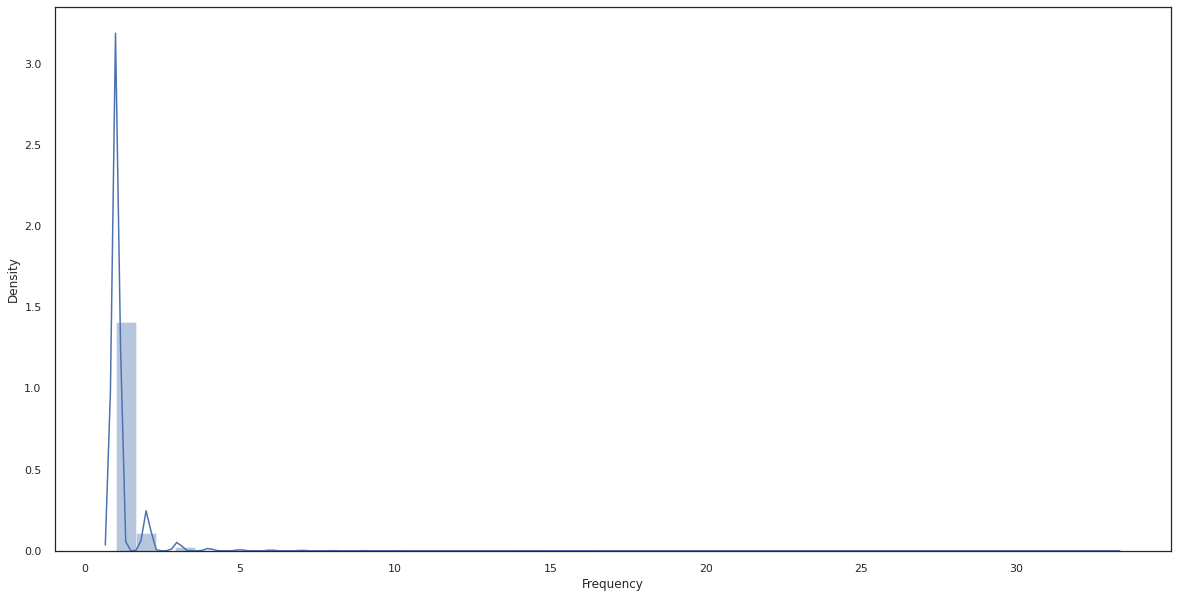

In [295]:
y = rfm_df['Frequency']

ay = sns.distplot(y)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


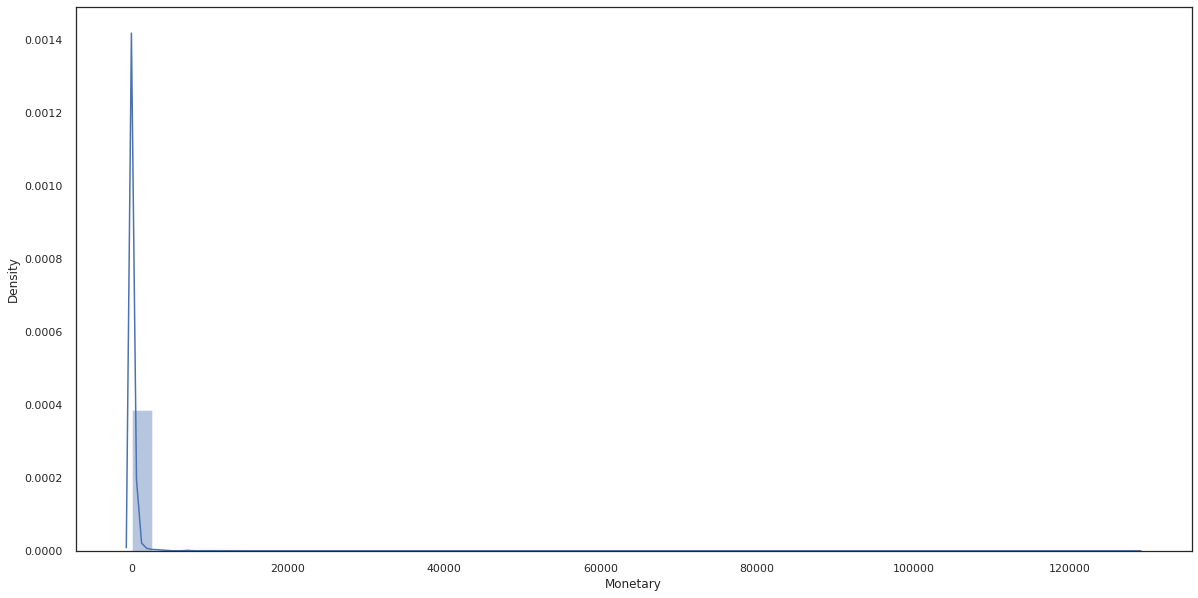

In [296]:
z = rfm_df['Monetary']

az = sns.distplot(z)

{'boxes': [<matplotlib.lines.Line2D at 0x7f3d2d6b4f10>],
 'caps': [<matplotlib.lines.Line2D at 0x7f3d2d725090>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f3d2d7a7a50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f3d2d6dcc50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f3d2d7b8bd0>,
  <matplotlib.lines.Line2D at 0x7f3d2d79de10>]}

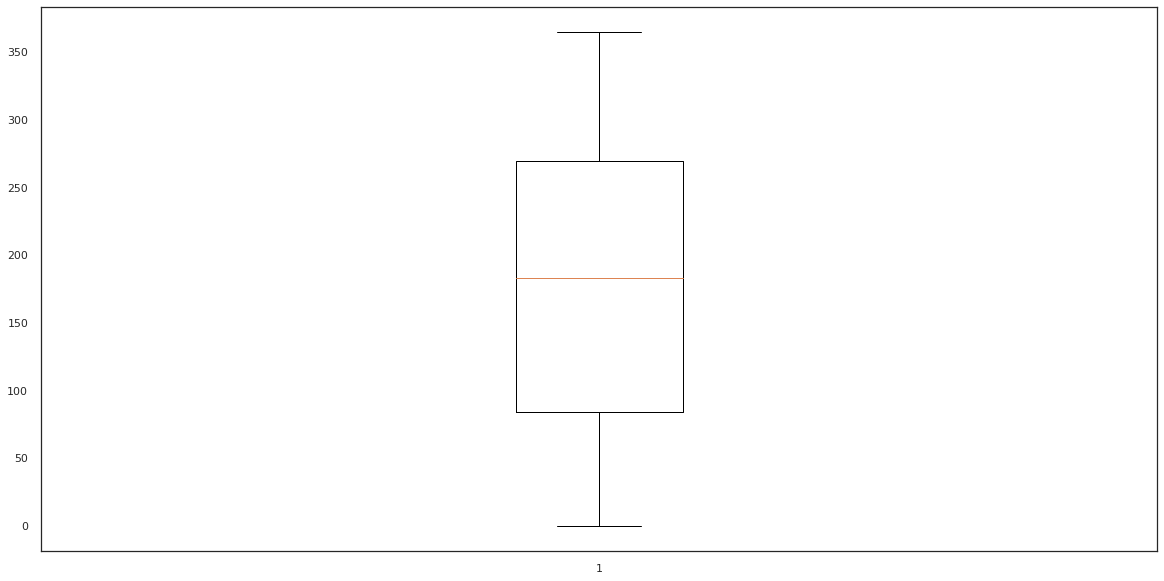

In [297]:
plt.boxplot(rfm_df.Recency)

{'boxes': [<matplotlib.lines.Line2D at 0x7f3d2c2b7710>],
 'caps': [<matplotlib.lines.Line2D at 0x7f3d2c13ec10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f3d2c2ead90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f3d2c6e9190>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f3d2c368390>,
  <matplotlib.lines.Line2D at 0x7f3d2c13e990>]}

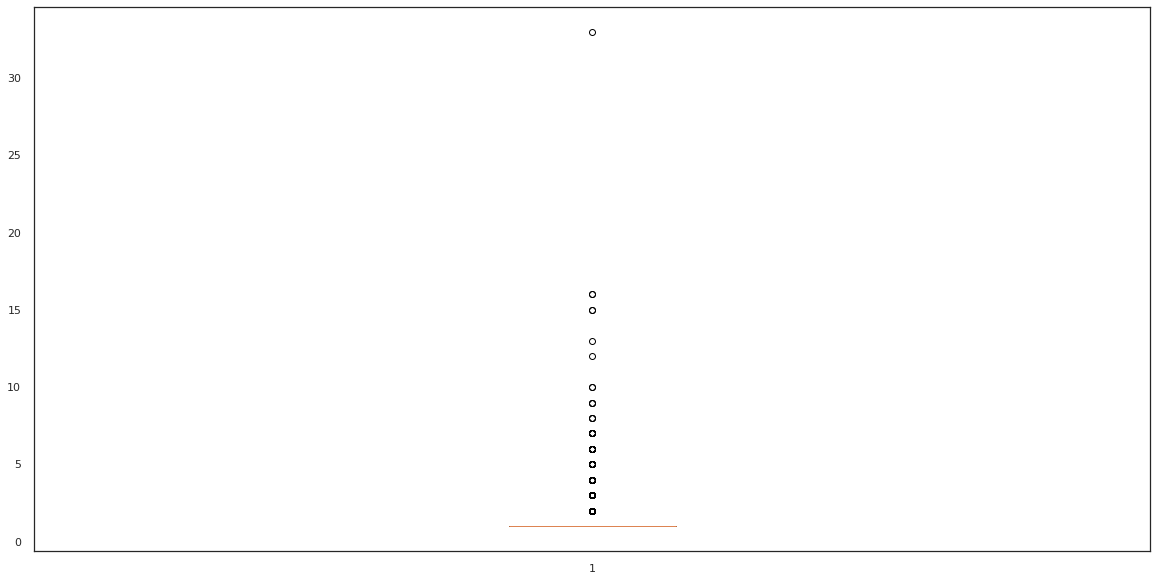

In [298]:
plt.boxplot(rfm_df.Frequency)

In [299]:
rfm_df.Frequency.mean()


1.1518607442977191

In [300]:
rfm_df.Frequency.std()

0.7103519120373181

In [301]:
upper_limit=rfm_df.Frequency.mean()+3*rfm_df.Frequency.std()
upper_limit

3.2829164804096735

In [302]:
lower_limit=rfm_df.Frequency.mean()-3*rfm_df.Frequency.std()
lower_limit

-0.9791949918142353

In [303]:
rfm_df=rfm_df[(rfm_df.Frequency<upper_limit)&(rfm_df.Frequency>lower_limit)]

{'boxes': [<matplotlib.lines.Line2D at 0x7f3d2c0bf350>],
 'caps': [<matplotlib.lines.Line2D at 0x7f3d2c0c4390>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f3d2c0cd3d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f3d2c0c4e50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f3d2c0bf8d0>,
  <matplotlib.lines.Line2D at 0x7f3d2c0bfe10>]}

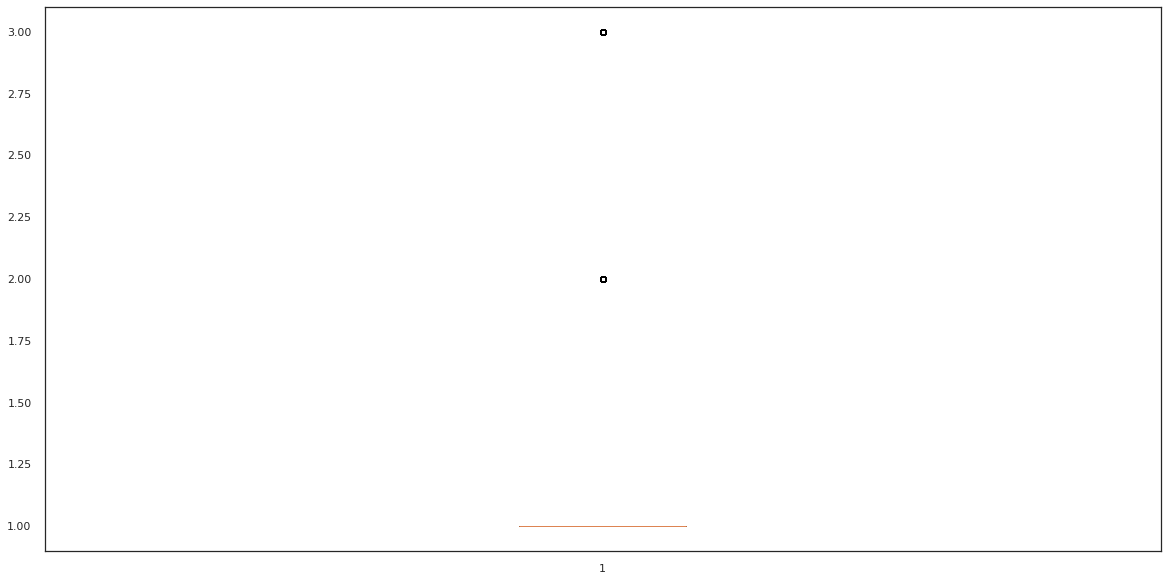

In [304]:
plt.boxplot(rfm_df.Frequency)

#Q1 = rfm_df.Frequency.quantile(0.25)
#Q3 = rfm_df.Frequency.quantile(0.75)
#IQR = Q3 - Q1
#rfm_df = rfm_df[(rfm_df.Frequency >= Q1 - 1.5*IQR) & (rfm_df.Frequency <= Q3 + 1.5*IQR)]

{'boxes': [<matplotlib.lines.Line2D at 0x7f3d2c027850>],
 'caps': [<matplotlib.lines.Line2D at 0x7f3d2c02c890>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f3d2c0328d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f3d2c032390>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f3d2c027dd0>,
  <matplotlib.lines.Line2D at 0x7f3d2c02c350>]}

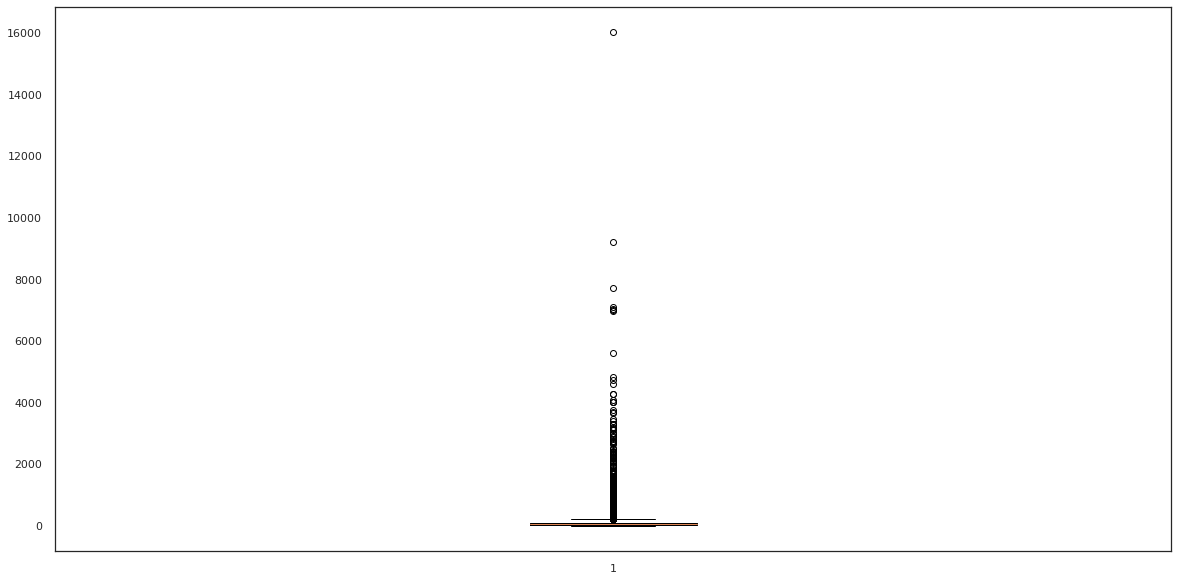

In [305]:
plt.boxplot(rfm_df.Monetary)

In [306]:
rfm_df.Monetary.mean()

141.40435788622815

In [307]:
rfm_df.Monetary.std()

386.04620420328445

In [308]:
upper_limit=rfm_df.Monetary.mean()+3*rfm_df.Monetary.std()
upper_limit

1299.5429704960814

In [309]:
lower_limit=rfm_df.Monetary.mean()-3*rfm_df.Monetary.std()
lower_limit

-1016.7342547236251

In [310]:
rfm_df=rfm_df[(rfm_df.Monetary<upper_limit)&(rfm_df.Monetary>lower_limit)]

{'boxes': [<matplotlib.lines.Line2D at 0x7f3d2bf9b8d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f3d2bf9f910>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f3d2bfa5950>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f3d2bfa5410>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f3d2bf9be50>,
  <matplotlib.lines.Line2D at 0x7f3d2bf9f3d0>]}

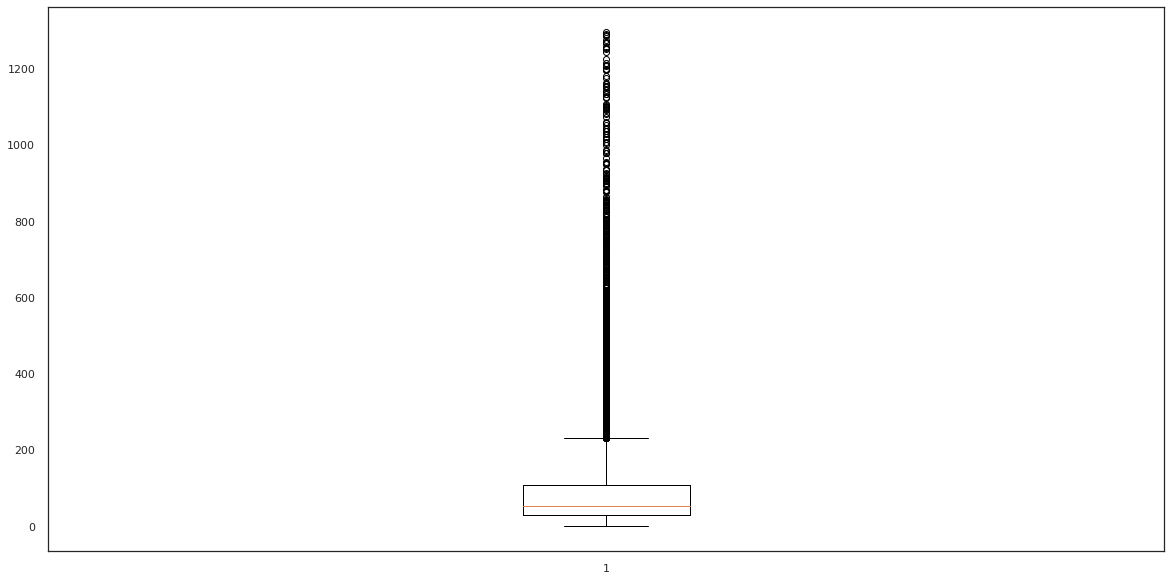

In [311]:
plt.boxplot(rfm_df.Monetary)

#Q1 = rfm_df.Monetary.quantile(0.25)
#Q3 = rfm_df.Monetary.quantile(0.75)
#IQR = Q3 - Q1
#rfm_df = rfm_df[(rfm_df.Monetary >= (Q1 - 1.5*IQR)) & (rfm_df.Monetary <= (Q3 + 1.5*IQR))]

In [312]:
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [313]:
rfm1=rfm_df[['Recency','Frequency','Monetary']]
scaler = StandardScaler()
x_scaled=scaler.fit(rfm1)
x_scaled = scaler.fit_transform(rfm1)
x_scaled

array([[-0.789141  , -0.28505126, -0.43237021],
       [ 0.96604399, -0.28505126, -0.3882805 ],
       [-0.75218973, -0.28505126,  0.29462013],
       ...,
       [ 0.51339102, -0.28505126, -0.42765506],
       [ 1.70506924, -0.28505126, -0.04897343],
       [ 0.71662296, -0.28505126, -0.2646456 ]])

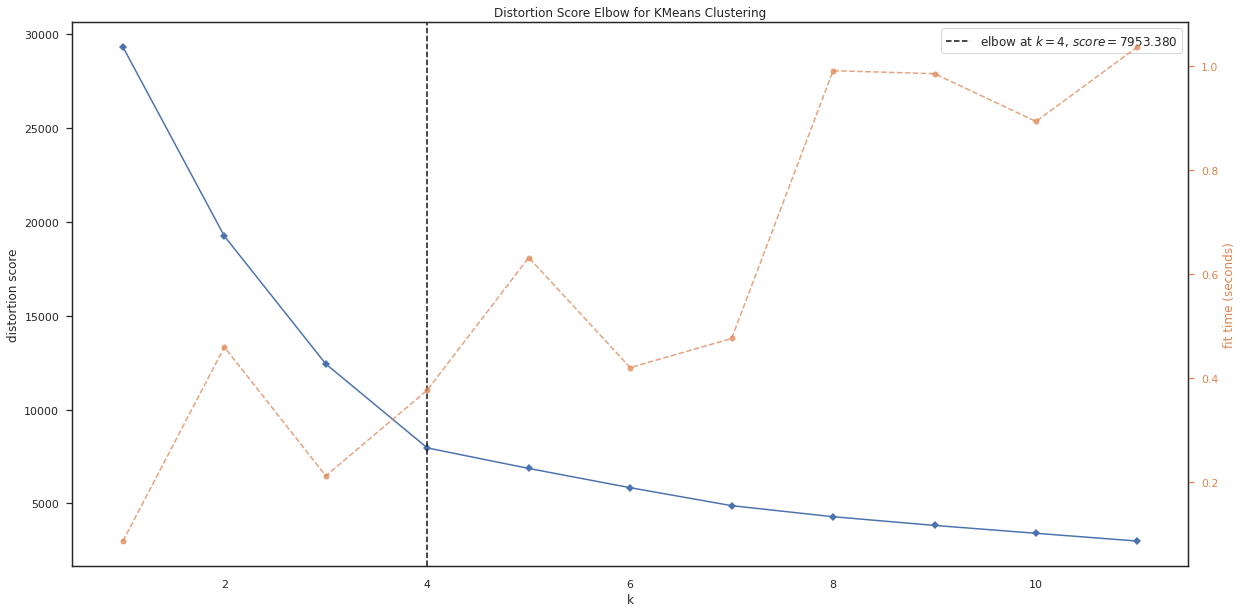

In [314]:
from yellowbrick.cluster import InterclusterDistance, KElbowVisualizer, SilhouetteVisualizer

model = KMeans()
visualizer = KElbowVisualizer (model, k=(1,12))
visualizer.fit(x_scaled)  
visualizer.show()  

[0 3 0 ... 3 3 3]
 Our cluster centers are as follows
[[ 0.86043507 -0.28505126 -0.21182452]
 [-0.90194099 -0.28505126 -0.24990597]
 [ 0.03808059  0.19911224  3.75161524]
 [-0.15864462  3.19161288  0.6974424 ]]


,Recency,Frequency,Monetary
cluster_pred,,,
0,4479,4479,4479
1,4158,4158,4158
2,391,391,391
3,747,747,747


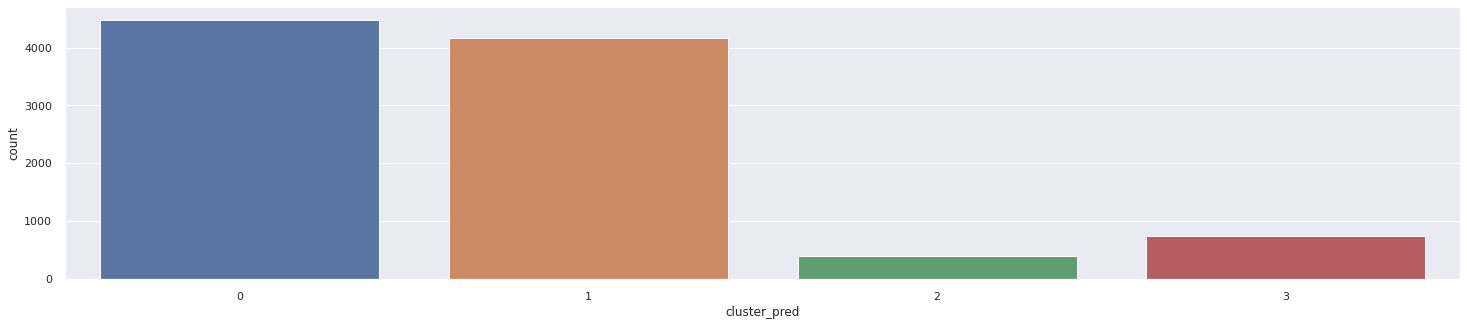

In [315]:
kmeans_scaled = KMeans(4)
kmeans_scaled.fit(x_scaled)
identified_clusters = kmeans_scaled.fit_predict(rfm1)
clusters_scaled = rfm1.copy()
clusters_scaled['cluster_pred']=kmeans_scaled.fit_predict(x_scaled)

print(identified_clusters)
print(" Our cluster centers are as follows")
print(kmeans_scaled.cluster_centers_)

sns.set(style="darkgrid")

f, ax = plt.subplots(figsize=(25, 5))
ax = sns.countplot(x="cluster_pred", data=clusters_scaled)
clusters_scaled.groupby(['cluster_pred']).count()

In [316]:
clusters_scaled.groupby(['cluster_pred']).count()

,Recency,Frequency,Monetary
cluster_pred,,,
0,4479,4479,4479
1,4158,4158,4158
2,391,391,391
3,747,747,747


In [317]:
df_count=clusters_scaled.groupby(['cluster_pred']).count()

In [318]:
df_count=pd.DataFrame(df_count)
df_count=df_count.loc[:,'Recency'].rename_axis('k_cluster').reset_index()
df_count.rename(columns = {'Recency':'count'}, inplace = True)

df_count

,k_cluster,count
0,0,4479
1,1,4158
2,2,391
3,3,747


In [319]:
clusters_scaled.groupby(['cluster_pred']).mean()

,Recency,Frequency,Monetary
cluster_pred,,,
0,273.567761,1.000000,75.605863
1,82.789322,1.000000,69.387032
2,184.547315,1.163683,722.849079
3,163.251673,2.175368,224.092249


In [320]:
df_mean=clusters_scaled.groupby(['cluster_pred']).mean()

In [321]:
df_mean=pd.DataFrame(df_mean)
df_mean=df_mean.rename_axis('k_cluster').reset_index()

df_mean

,k_cluster,Recency,Frequency,Monetary
0,0,273.567761,1.000000,75.605863
1,1,82.789322,1.000000,69.387032
2,2,184.547315,1.163683,722.849079
3,3,163.251673,2.175368,224.092249


In [322]:
df_cluster = df_count.merge(df_mean, on='k_cluster')

df_cluster

,k_cluster,count,Recency,Frequency,Monetary
0,0,4479,273.567761,1.000000,75.605863
1,1,4158,82.789322,1.000000,69.387032
2,2,391,184.547315,1.163683,722.849079
3,3,747,163.251673,2.175368,224.092249


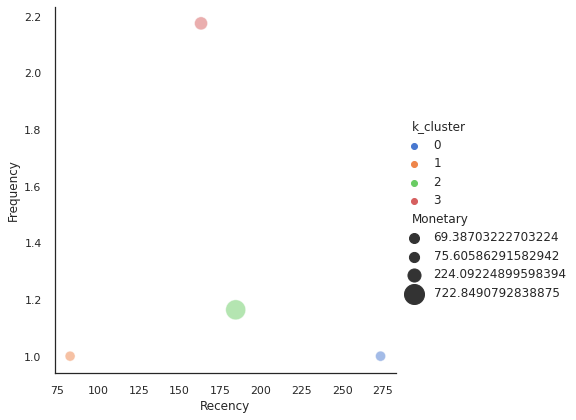

In [323]:
sns.set_theme(style="white")

sns.relplot(x="Recency", y="Frequency",hue="k_cluster", size="Monetary",
            sizes=(100, 400), alpha=.5, palette="muted",
            height=6, data=df_cluster)

In [324]:
clusters_scaled.head()


,Recency,Frequency,Monetary,cluster_pred
0,95,1,39.59,1
1,285,1,46.79,0
2,99,1,158.31,1
3,223,1,45.97,0
4,22,1,43.98,1


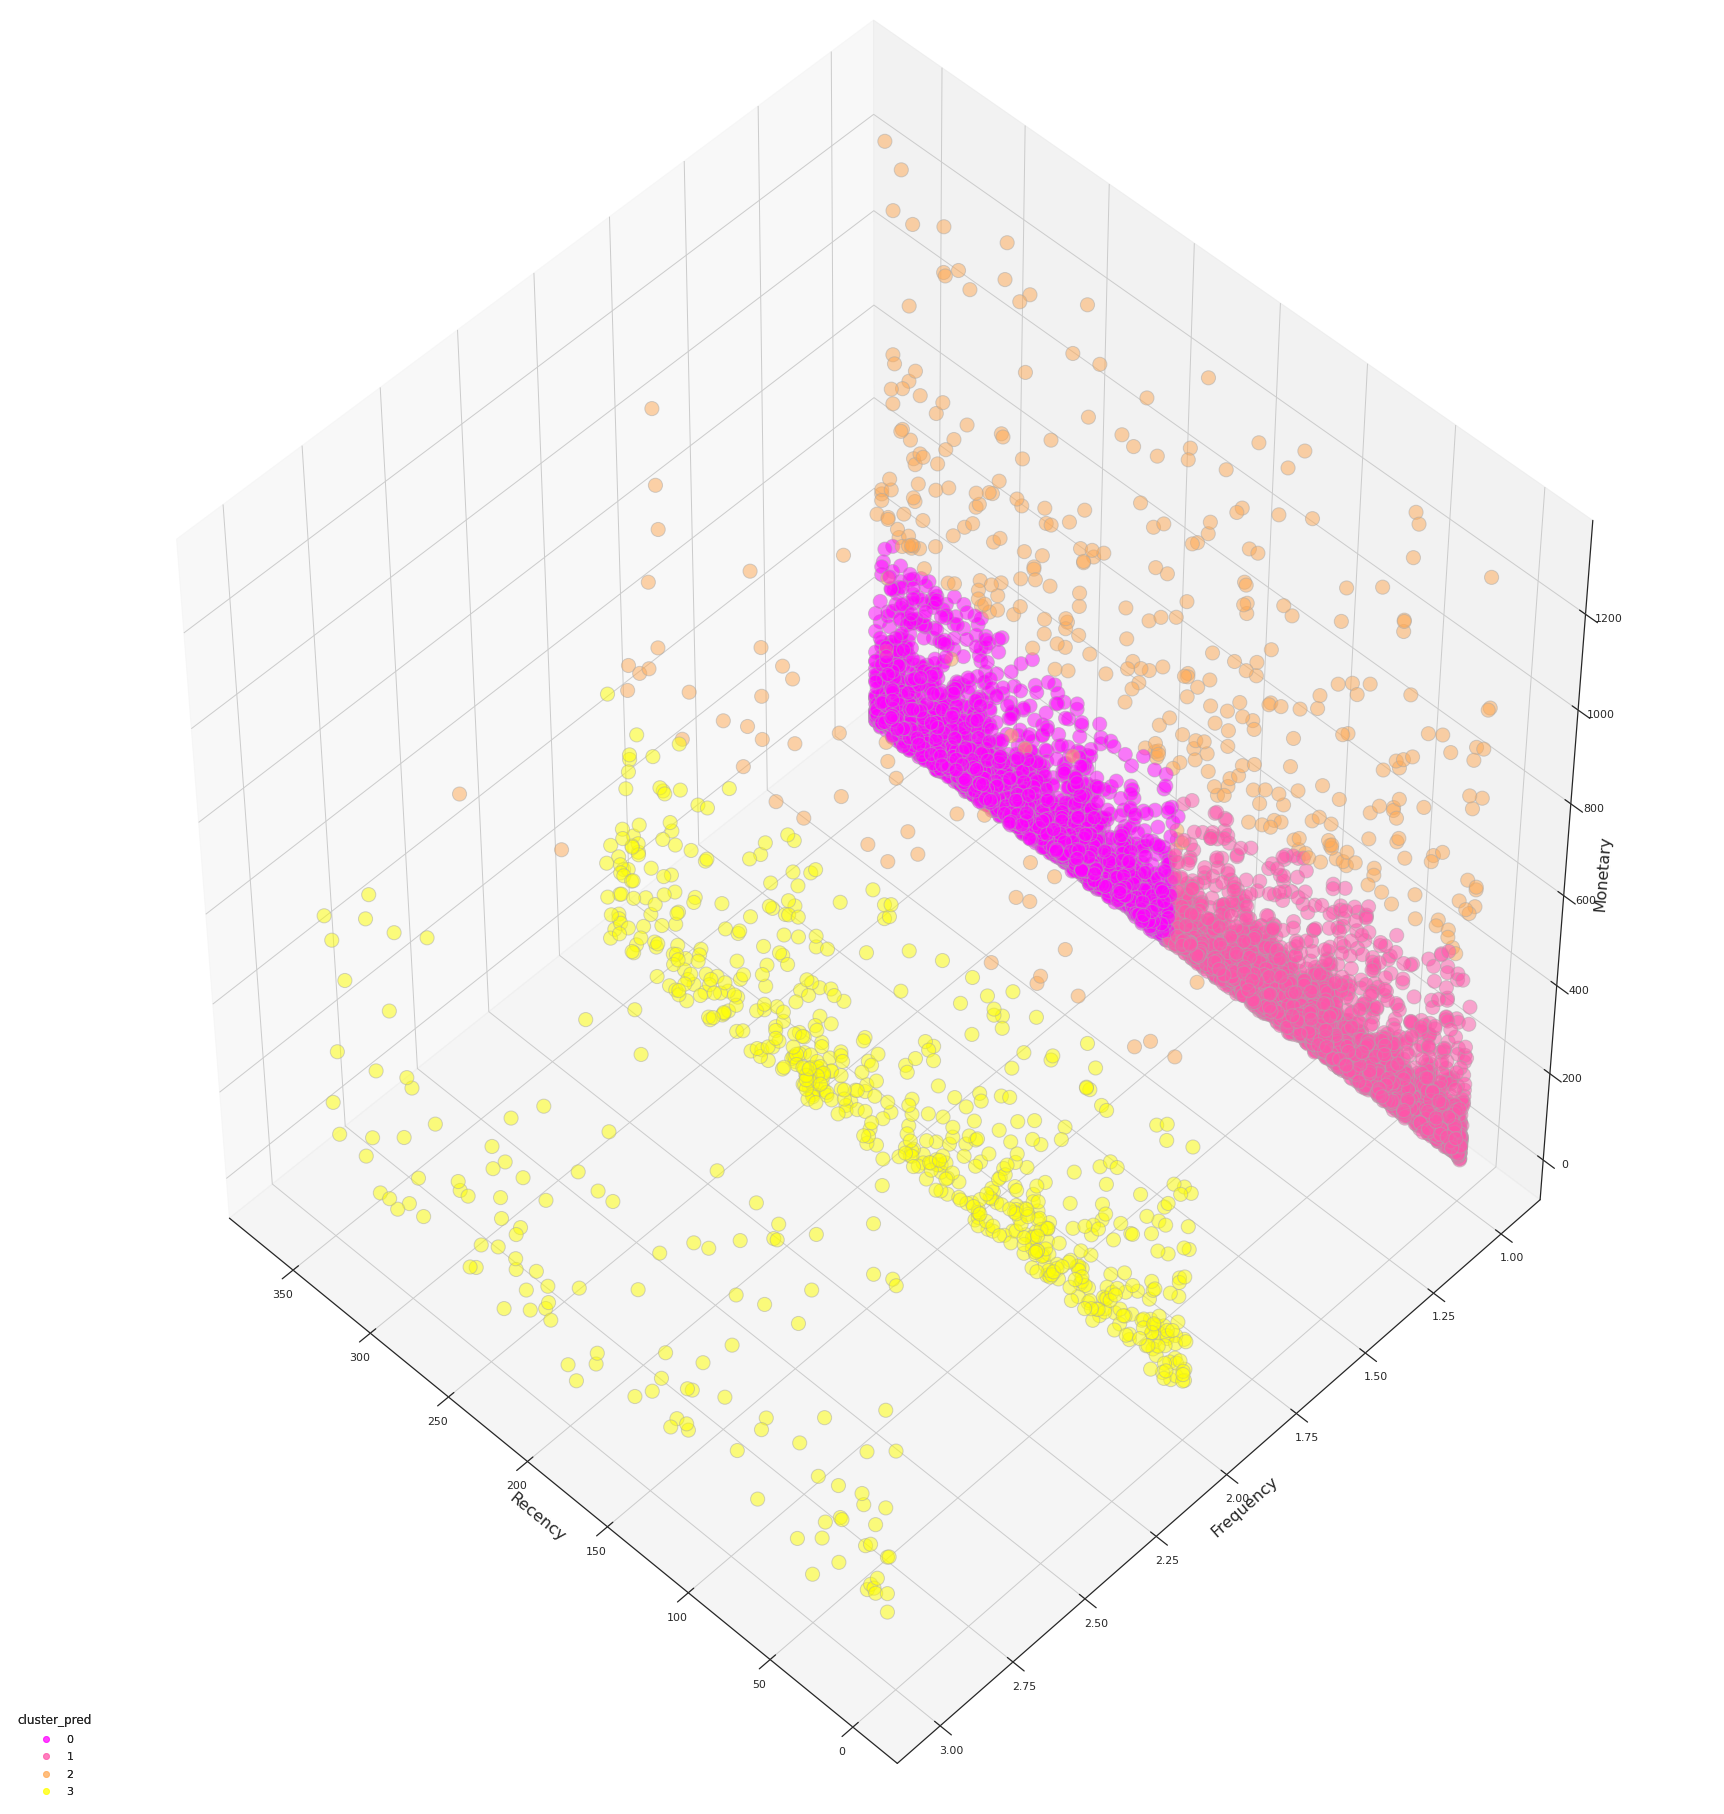

In [325]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

plt.rcParams["figure.figsize"]=(25,25)
fig = plt.figure(1)
plt.clf()
ax= Axes3D(fig,
           rect=[0,0,.95,1],
           elev=48,
           azim=134)
plt.cla()
sc=ax.scatter(clusters_scaled['Recency'],clusters_scaled['Frequency'],clusters_scaled['Monetary'],c=clusters_scaled['cluster_pred'],
           s=200,cmap='spring',
           alpha=0.5,
           edgecolor='darkgrey')
ax.set_xlabel('Recency',fontsize=16)
ax.set_ylabel('Frequency',fontsize=16)
ax.set_zlabel('Monetary',fontsize=16)



legend1 = ax.legend(*sc.legend_elements(),
                    loc="lower left", title="cluster_pred")
ax.add_artist(legend1)

plt.show()

           

In [329]:
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [330]:
clusters_scaled.to_csv('clusters_scaled.csv')
!cp clusters_scaled.csv "drive/My Drive/"

,Recency,Frequency,Monetary,cluster_pred
0,95,1,39.59,1
1,285,1,46.79,0
2,99,1,158.31,1
3,223,1,45.97,0
4,22,1,43.98,1
